# Агрегирование и сортировка.

Не забудьте отправить решения задач в систему Яндекс.Контест:
- [Контест](https://contest.yandex.ru/contest/75323/enter) для 413 группы;
- [Контест](https://contest.yandex.ru/contest/75324/enter) для 414 группы;
- [Контест](https://contest.yandex.ru/contest/75325/enter) для 415 группы;
- [Контест](https://contest.yandex.ru/contest/75325/enter) для 416 группы;

**Импорт библиотек:**

In [2]:
import numpy as np

## Агрегирование

Согласно одному из возможных определений, агрегированием называется объединение элементов по определенному правилу. В нашем случае, в роли правил для объединения будут выступать различные математические операции, например, суммирование, произведение или вычисление максимума. Операции агрегирования являются весьма важными операциями, поскольку в большом количестве различных алгоритмов так или иначе приходится суммировать различные данные, вычислять максимумы и минимумы. Также большое количество агрегирующих операций используется в статистике и науке о данных при вычислении сводных показателей: среднего, медианы, среднеквадратичного отклонения и т.д.

Из вышесказанного следует полезность агрегирующих операций, оттого неудивительно их наличие в NumPy.

### Суммы и произведения

Мы уже видели возможности нахождения суммы или произведения элементов массива с помощью агрегирующих методов соответствующих векторизованных операций. Однако, есть более удобный и гибкий способ вычисления, как простых сумм/произведений элементов, так и их кумулятивных вариантов:

In [ ]:
array = np.random.randint(-10, 10, size=9)
print(f"{array = }")

print(
    f"sum: {np.sum(array)};",
    f"prod: {np.prod(array)};",
    f"cumulative sum: {np.cumsum(array)};",
    f"cumulative prod:\n{np.cumprod(array)}",
    sep="\n",
)

### Сводные показатели

Также в NumPy есть возможность вычислять сводные показатели массива данных. К числу таких показателей относятся максимумы/минимумы, среднее значение, медиана, среднеквадратичное отклонение.

In [ ]:
array = np.random.randint(-10, 10, size=9)
print(f"{array = }")

print(
    f"min: {np.min(array)};",
    f"max: {array.max()};",
    f"mean: {np.mean(array)};",
    f"median: {np.median(array)};",
    f"std: {np.std(array)};",
    f"variance: {np.var(array)};",
    sep="\n",
)

### Булево агрегирование

Также мы можем агрегировать массивы, используя значения их элементов в булевом контексте с помощью специальных функций `all` и `any`, которые очень похожи на свои аналоги в "чистом" Python.

In [ ]:
array = np.random.randint(-10, 10, size=9)
print(f"{array = }")

print(
    f"all: {array.all()};",
    f"any: {np.any(array)};",
    sep="\n",
)

### Позиционирование

В ряде задач важно не столько найти значение экстремума, сколько найти его положение. Например, знание информации о положении экстремума в массиве может оказаться очень полезным при визуализации содержимого массива. Рассмотрим пример, пусть нам дан одномерный массив, описывающий значения некоторой функции на заданном отрезке. При визуализации этого массива мы бы хотели явно отметить точку максимума на рисунке. Для этой цели мы будем использовать специальную функцию `argmax()`, которая позволяет найти позицию максимального элемента. В NumPy также существует аналогичная функция для поиска минимального элемента (угадайте, как она называется).

In [ ]:
from utils import visualize_1d


time = np.linspace(0, np.pi * 2, 500)
signal_high_freq = np.sin(time * 10)
signal = 5 * np.sin(time * 0.5) * signal_high_freq

extremum = [(time[np.argmax(signal)], np.max(signal))]
visualize_1d(time, signal, extremum)

Мы также можем искать позицию экстремума и в многомерном массиве, однако, здесь есть небольшой нюанс.

In [ ]:
array = np.random.randint(-10, 10, size=(4, 4))
print(f"array:\n{array}", end="\n\n")

position_min = np.argmin(array)
print(f"{position_min = }")

В примере выше мы получили одно число вместо ожидаемой позиции минимального элемента в двумерном массиве. Но почему? Все дело в том, что для упрощения поиска, NumPy сначала "вытягивает" многомерный массив в одномерны. Т.е. фактически, в примере выше произошло следующее:

In [ ]:
array_flatten = array.flatten()
print(f"array flattened:\n{array_flatten}", end="\n\n")

print(f"elem min: {array_flatten[position_min]}")

Теперь мы понимаем, как именно была посчитана позиция минимального элемента в случае двумерного массива. Однако от этого легче нам не становится, ведь мы по прежнему не знаем индексы минимума в двумерном массиве. В этом случае мы, конечно, могли бы написать функцию для перевода индекса одномерного массива в индексы колонок и столбцов двумерного массива, которые соответствуют минимальному элементу. Но что делать если мы имеем дело с четырехмерным массивом? А с восьмимерным? Неужели нам придется писать функции перевода для каждого случая?

На самом деле нет, ведь в NumPy все уже давно реализовано:

In [ ]:
position_min_2d = np.unravel_index(position_min, shape=array.shape)
print(f"position_min = {position_min_2d}")

Стоит иметь в виду описанyю особенность при работе с многомерными массивами и не забывать о функции `unravel_index`.

### Замечание

Большая часть функций, описанных выше, является аналогами соответствующих функций в "чистом" Python, однако, не стоит считать, что они взаимозаменяемы. Во-первых, аналоги из Python будут работать значительно медленнее функций из NumPy в силу причин, которые были рассмотрены на предыдущих семинарах. Во-вторых, функции Python не умеют корректно работать с многомерными массивами, в отличие от функций NumPy. Более того, функции NumPy позволяют настраивать агрегирование, о чем мы поговорим далее.

## Агрегирование по измерениям

Во всех примерах выше мы применяли операции агрегирования к одномерным массивам. Однако, как было сказано в предыдущем абзаце, мы можем применять указанные операции и к многомерным массивам.

In [ ]:
array = np.random.randint(-10, 10, size=(3, 4))
print(f"array:\n{array}", end="\n\n")

print(
    f"sum: {np.sum(array)};",
    f"cumulative sum: {np.cumsum(array)};",
    f"max: {np.max(array)};",
    sep="\n",
)

Как вы видите, в этом случае операция будет применяться ко всему массиву, игнорируя его пространственные данные. Однако, с помощью специального аргумента `axis` вы можете выбирать, для каких именно измерений массива применять ту или иную операцию. Рассмотрим эти возможности на примере функции `sum`, поскольку поведение остальных функций в контексте их применения для конкретных измерений, не будет отличаться.

In [ ]:
array = np.random.randint(-10, 10, size=(3, 4))
print(f"array:\n{array}", end="\n\n")

print(
    f"sum whole: {np.sum(array)};",
    f"sum per column: {np.sum(array, axis=0)};",
    f"sum per row: {np.sum(array, axis=1)};",
    sep="\n",
)

Как вы видите, теперь у нас есть возможность агрегировать данные по определенным измерениям. Обращаем ваше внимание на то, что массив "схлопывается" вдоль указанных измерений, а результирующий массив имеет меньшую размерность, при этом сохраняя свои исходные размеры вдоль оставшихся измерений. При необходимости вы можете сохранить и размерность исходного массива, однако размер вдоль агрегированного измерения все равно будет "схлопнут".

In [ ]:
print(f"sum per column: {np.sum(array, axis=0, keepdims=True)};")

Сохранение размерности бывает очень полезным, особенно при использовании результирующего массива в векторизованных операциях с применением трансляции.

Помимо указания измерения в виде целых неотрицательных чисел, вы можете задавать измерения агрегации с помощью кортежей, в этом случае агрегация будет происходить вдоль указанных измерений. Также вы можете использовать отрицательные целые числа. Например, `-1` - в этом случае агрегация будет осуществлена по последнему измерению массива.

In [ ]:
array = np.random.randint(-10, 10, size=(2, 3, 2))
print(f"array:\n{array};", end="\n\n")

print(
    f"axis negative:\n{np.sum(array, axis=-2)}",
    f"axis tuple:\n{np.sum(array, axis=(0, 2))}",
    f"axis tuple keepdim:\n{np.sum(array, axis=(0, 2), keepdims=True)}",
    sep="\n\n",
)

## Сортировки

### Сортировка

Из курса по алгоритмам и структурам данных вам должна быть известна важность алгоритмов сортировки. Зачастую сортировка является полезной как сама по себе, так и как шаг в более сложных алгоритмах. Именно поэтому в NumPy реализована возможность сортировки массивов. Подобно "чистому" Python функция сортировки существует в двух вариантах: как отдельная функция, которая создает новый массив с отсортированными значениями, и как метод массива, который осуществляет сортировку на месте.

In [ ]:
array = np.random.randint(-10, 10, size=10)
print(f"array:\n{array}", end="\n\n")

array_sorted = np.sort(array)
print(
    f"array original:\n{array}",
    f"array sorted:\n{array_sorted}",
    f"array_sorted is array: {array_sorted is array}",
    sep="\n",
    end="\n\n"
)

array.sort()
print(f"array:\n{array}", end="\n\n")

В отличие от функций Python данные функции имеют ряд интересных особенностей, помимо разницы в производительности. С одной из таких особенностей мы уже знакомы: возможность применения операции вдоль определенного измерения.

In [ ]:
array = np.random.randint(-10, 10, size=(3, 4))
print(f"array:\n{array}", end="\n\n")

print(
    f"default sort:\n{np.sort(array)}",
    f"per row sort:\n{np.sort(array, axis=-1)}",
    f"per column sort:\n{np.sort(array, axis=0, kind='quicksort')}",
    sep="\n\n",
)

Следующая интересная особенность функций сортировки - возможность выбора алгоритма сортировки. Если в Python функции сортировки использовали *timsort*, то в NumPy вы можете выбрать подходящий для конкретной задачи алгоритм, передав в функцию параметр `kind`. На выбор доступны следующие варианты: *quicksort*, *mergesort*, *heapsort*, *stable*.

### Сортировка индексов

Помимо обычных сортировок в NumPy реализована возможность вычисления сортировки по аргументу. Т.е. существуют специальные функции, которые вычисляет не отсортированный массив, а массив индексов. Индексы расположены так, как соответствующие им элементы должны были бы располагаться в отсортированном массиве, при этом сам массив изменений не претерпевает.

In [ ]:
array = np.random.randint(-10, 10, size=10)
print(f"array:\n{array}", end="\n\n")

indices = np.argsort(array)
print(
    f"array:\n{array}",
    f"indices:\n{indices}",
    f"array sorted:\n{array[indices]}",
    sep="\n",
)

Данная функция также может быть использована вдоль определенных измерений массива.

In [ ]:
array = np.random.randint(-10, 10, size=(3, 4))
print(f"array:\n{array}", end="\n\n")

print(
    f"default sort:\n{np.argsort(array)}",
    f"per row sort:\n{np.argsort(array, axis=-1)}",
    f"per column sort:\n{np.argsort(array, axis=0)}",
    sep="\n"
)

Обратите ваше внимание, что сортировка осуществляется в порядке не убывания, а аргумент `reverse` отсутствует. Подумайте о возможных способах реализации сортировки в порядке не возрастания с помощью операций NumPy.

## Практика 1. МНК

Необходимо реализовать функцию для нахождения коэффициентов линейной функции с помощью МНК.

*Входные данные*:
- `abscissa` - np.ndarray, абсциссы точек;
- `ordinates` - np.ndarray, ординаты точек;

*Выходные данные*:
- Кортеж (`tuple`) двух чисел с плавающей точкой: коэффициент наклона `a` и смещение `b` функции $y = ax + b$;

*Сторонние эффекты*:
- Если количества элементов во входных массивах `abscissa` и `ordinates` отличаются, необходимо возбудить исключение `ShapeMismatchError`.

*Замечания*:
- Гарантируется, что на вход подаются непустые одномерные массивы чисел с плавающей точкой;
- Гарантируется, что входные массивы не описывают функции $y = const$ и $x = const$;
- Формулы для нахождения коэффициентов линейной функции $y = ax + b$ с помощью МНК:
    $$a = \frac{<xy> - <x><y>}{<x^2> - <x>^2}$$  
    $$b = <y> - a<x>$$

    Нотация `<...>` используется для обозначения среднего значения.

**Решение**:

In [17]:
from numbers import Real

from utils import visualize_lsm

In [18]:
class ShapeMismatchError(Exception):
    pass

In [19]:
def get_lsm_coefficients(
    abscissa: np.ndarray,
    ordinates: np.ndarray,
) -> tuple[Real, Real]:
    # код семинариста

    return 0, 0

**Проверка**:

In [ ]:
abscissa = np.linspace(0, 10, 100)
ordinates_experiment = abscissa * 5 + 3
ordinates_experiment += 2 * np.random.normal(size=abscissa.size)

incline, shift = get_lsm_coefficients(abscissa, ordinates_experiment)
print(
    f"computed incline: {incline:.2f};",
    f"computed shift: {shift:.2f};",
    sep="\n",
)

In [ ]:
visualize_lsm(
    abscissa=abscissa,
    ordinates_experiment=ordinates_experiment,
    ordinates_computed=incline * abscissa + shift,
)

## Задача 1. Ну что там с деньгами?

Предположим, что вы работаете аналитиком в некоторой IT-компании. Компания специализируется на разработке некоторых сервисов. Для осуществления доступа к конкретному сервису пользователи должны оформлять отдельную подписку. Доход с подписок - основная статья дохода вашей компании. На данный момент компании удалось вывести на рынок 4 сервиса.

Итак, перед вами, как перед аналитиком, стоит задача - рассчитать некоторые показатели для дальнейшего построения гипотез, имея на руках данные о месячных доходах от продаж подписок.

### Часть 1. Самый прибыльный месяц

Реализуйте функцию для определения месяца, в который был получен максимальный доход.

*Входные данные*:
- `amounts_of_sold_subscriptions` - двумерная матрица $12 \times N$, элементы которой - целые неотрицательные числа. Строки матрицы соответствуют количествам подписок на сервисы, проданных в данном месяце. Порядок следования строк соответствует порядку следования месяцев в году: первая строка соответствует январю, вторая - февралю и т.д.
- `subscriptions_prices` - одномерный массив целых чисел - стоимости подписок на сервисы.

*Выходные данные*:
- Строка - название самого прибыльного месяца, записанного на английском языке с большой буквы. Т.е. если самым прибыльным месяцем будет май, то функция должна вернуть строку `May`.

*Сторонние эффекты*:
- Если количество столбцов в матрице `amounts_of_sold_subscriptions` не соответствует количеству элементов в массиве `subscriptions_prices`, необходимо возбудить исключение `InconsistentDataError`.

*Замечания*:
- Гарантируется, что на вход подаются непустые массивы;
- Гарантируется, что `amounts_of_sold_subscriptions` - двумерный массив, содержащий 12 строк;
- Гарантируется, что `subscriptions_prices` - одномерный массив;

**Решение**:

In [22]:
class InconsistentDataError(Exception):
    pass

In [23]:
def get_most_profitable_month_name(
    amounts_of_sold_subscriptions: np.ndarray,
    subscriptions_prices: np.ndarray,
) -> str:
    # ваш код

    return ""

### Часть 2. Фиксируем прибыль

Реализуйте функцию для подсчета среднего значения. Функция должна уметь считать средний доход за год, средний доход за каждый месяц и средний годовой доход от продажи подписки для каждого сервиса.

*Входные данные*:
- `amounts_of_sold_subscriptions` - двумерная матрица $12 \times N$, элементы которой - целые неотрицательные числа. Строки матрицы соответствуют количествам подписок на сервисы, проданных в данном месяце. Порядок следования строк соответствует порядку следования месяцев в году: первая строка соответствует январю, вторая - февралю и т.д.
- `subscriptions_prices` - одномерный массив целых чисел - стоимости подписок на сервисы.
- `strategy` - значение enum'a `Strategies` или `None` - стратегия подсчета среднего. Если значение `None` - необходимо вернуть число - средний доход от продажи всех подписок за весь год. Если передан элемент `Strategies`, необходимо вычислить средние значения дохода для каждого месяца или средние значения годового дохода от продаж всех подписок.

*Выходные данные*:
- Число или одномерный массив `np.ndarray` - средние значения дохода.

*Сторонние эффекты*:
- Если количество столбцов в матрице `amounts_of_sold_subscriptions` не соответствует количеству элементов в массиве `subscriptions_prices`, необходимо возбудить исключение `InconsistentDataError`.

*Замечания*:
- Гарантируется, что на вход подаются непустые массивы;
- Гарантируется, что `amounts_of_sold_subscriptions` - двумерный массив, содержащий 12 строк;
- Гарантируется, что `subscriptions_prices` - одномерный массив;
- Гарантируется, что значение `strategy` - это или `None`, или значения из enum'a;

**Решение**:

In [24]:
from enum import Enum
from numbers import Real

In [25]:
class Strategies(Enum):
    BY_GOOD = ...   # придумайте значение enum'а
    BY_MONTH = ...  # придумайте значение enum'а

In [26]:
def get_mean_profit(
    amounts_of_sold_subscriptions: np.ndarray,
    subscriptions_prices: np.ndarray,
    strategy: Strategies | None = None,
) -> np.ndarray | Real:
    # ваш код
    
    return 0

### Часть 3. 12 месяцев

Реализуйте функцию для сортировки названий месяцев в соответствии с месячным доходом.

*Входные данные*:
- `amounts_of_sold_subscriptions` - двумерная матрица $12 \times N$, элементы которой - целые неотрицательные числа. Строки матрицы соответствуют количествам подписок на сервисы, проданных в данном месяце. Порядок следования строк соответствует порядку следования месяцев в году: первая строка соответствует январю, вторая - февралю и т.д.
- `subscriptions_prices` - одномерный массив целых чисел - стоимости подписок на сервисы.
- `ascending` - булево значение. Если булево значение равно `True`, то названия месяцев должны быть отсортированы по возрастанию доходов. Иначе - по убыванию доходов.

*Выходные данные*:
- Список строк - список имен месяцев, отсортированных в соответствии с месячным доходов и выбранным порядком сортировки. Названия месяцев записываются на английской языке с большой буквы.

*Замечания*:
- Гарантируется, что на вход подаются непустые массивы;
- Гарантируется, что `amounts_of_sold_subscriptions` - двумерный массив, содержащий 12 строк;
- Гарантируется, что `subscriptions_prices` - одномерный массив;

**Решение**:

In [27]:
def sort_month_names_by_profits(
    amounts_of_sold_subscriptions: np.ndarray,
    subscriptions_prices: np.ndarray,
    ascending: bool = True,
) -> list[str]:
    # ваш код

    return []

## Задача 2. Нечеткий парень

В этом задании перед вами стоит задача реализовать фильтр размытия, аналогичный фильтрам размытия из различных редакторов фото. Но прежде чем переходить к реализации самого фильтра размытия, необходимо выполнить подготовительные шаги.

### Часть 1. Паддингтон

Слово паддинг (англ. *padding*) буквально можно перевести, как отступ. В контексте текущей задачи паддингом мы будем называть рамку вокруг изображения, шириной в заданное число пикселей, заполненную нулями. На картинке ниже приведен пример добавления паддинга шириной в 1 пиксель к входному изображению.

![padding](./images/padding.jpg)

Ваша задача - реализовать функцию добавления паддинга.

*Входные данные*:
- `image` - двумерный или трехмерный массив - черно-белое или RGB изображение.
- `pad_size` - натуральное число, ширина паддинга.

*Выходные данные*:
- Исходное изображение с добавленным паддингом. Т.е. `image`, заключенное в рамку из 0 шириной в `pad_size` пикселей.

*Сторонние эффекты*:
- Если значение `pad_size` меньше единицы, необходимо возбудить исключение `ValueError`.

**ВАЖНО**: в это задании запрещено использовать функцию `np.pad`. Решения с использованием `np.pad` будут оценены в 0 баллов! 

**Решение**:

In [14]:
def pad_image(image: np.ndarray, pad_size: int) -> np.ndarray:

    if pad_size < 1:
        raise ValueError("Pad size must be greater than or equal to 1")

    match (image.ndim):
        case 2:
            rows, cols = image.shape
            new_rows, new_cols = rows + 2 * pad_size, cols + 2 * pad_size
            padded = np.zeros((new_rows, new_cols))
            padded[pad_size : (pad_size + rows), pad_size : (pad_size + cols)] = image
        case 3:
            rows, cols, rgb = image.shape
            new_rows, new_cols = rows + 2 * pad_size, cols + 2 * pad_size
            padded = np.zeros((new_cols, new_rows, rgb))
            padded[pad_size : (pad_size + rows), pad_size : (pad_size + cols), :] = image
        case _:
            raise ValueError("Image must be 2D or 3D")

    return padded

### Часть 2. Размытие

Теперь мы готовы реализовывать фильтр размытия. Размытие изображения работает достаточно просто:

- Сначала задается размер окна размытия - $l_w$, которое можно интерпретировать, как степень размытия. Чем больше окно размытия, тем сильнее результирующая картинка будет размыта. Обычно в качестве размеров окна размытия используются нечетные целые числа.
- Следующий шаг - это применение паддинга к входному изображению размеров $ N \times M $, причем ширина паддинга соответствует следующему выражению: $\lfloor\frac{l_w}{2}\rfloor$.  
- Затем, по всему изображению с паддингом запускается обход скользящим окном размеров $l_w \times l_w$, причем центр окна всегда находится в пикселях, соответствующих пикселям исходного изображения. Т.е. центр окна размытия проходит пиксели из области $[l_w, l_w + N] \times [l_w, l_w + M]$
- В каждом положении окна размытия вычисляется среднее значений пикселей, попавших в окно. Результат записывается в новый массив, тех же размеров, что и исходное изображение.

![blur](./images/conv.png)

Ваша задача - реализовать функцию для размытия изображений.

*Входные данные*:
- `image` - двумерный или трехмерный массив - черно-белое или RGB изображение.
- `kernel_size` - натуральное нечетное число, размер окна размытия.

*Выходные данные*:
- Размытое изображение.

*Сторонние эффекты*:
- Если `kernel_size` четное число или `kernel_size` меньше 1, необходимо возбудить исключение `ValueError`.

**Решение**:

In [ ]:
def blur_image(
    image: np.ndarray,
    kernel_size: int,
) -> np.ndarray:

    if kernel_size < 1 or kernel_size % 2 == 0:
        raise ValueError("Kernel size must be an odd number greater than 1")

    padded = pad_image(image, kernel_size // 2)
    result = np.zeros_like(image)

    match (image.ndim):
        case 2:
            rows, cols = image.shape
            for i in range(rows):
                for j in range(cols):
                    blur_space = padded[i : (i + kernel_size), j : (j + kernel_size)]
                    result[i, j] = np.mean(blur_space)
        case 3:
            rows, cols, rgb = image.shape
            for i in range(rows):
                for j in range(cols):
                    blur_space = padded[i : (i + kernel_size), j : (j + kernel_size), :]
                    result[i, j, :] = np.mean(blur_space, axis=(0, 1))
        case _:
            raise ValueError("Image must be 2D or 3D")

    return result

**Тестирование**:

In [16]:
from utils import compare_images, get_image

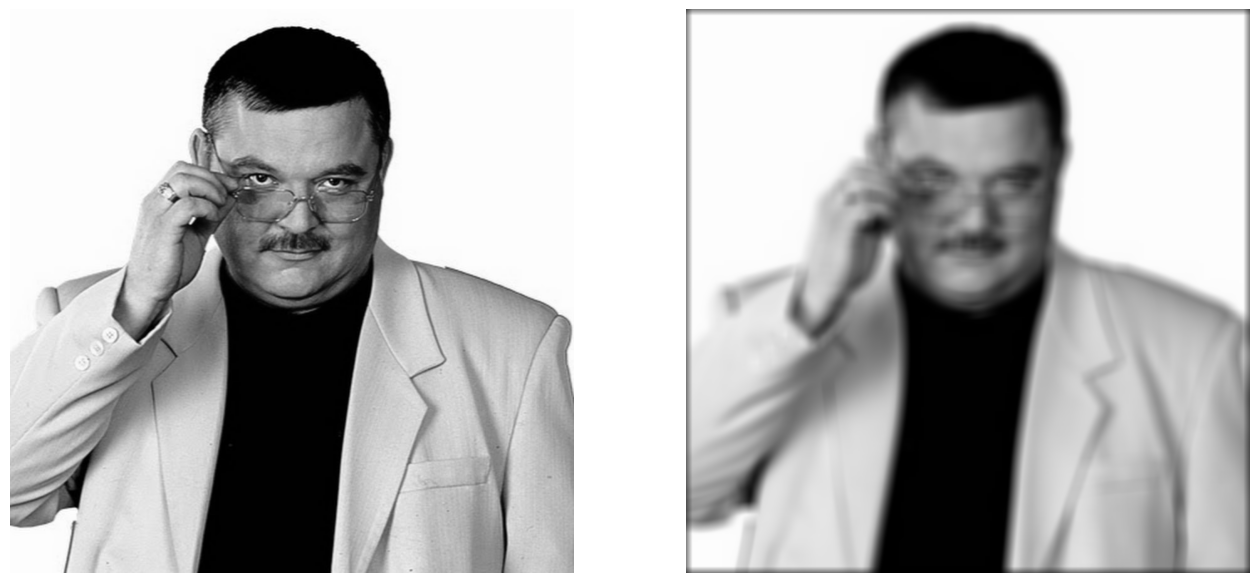

In [17]:
image = get_image("./images/circle.jpg")
image_blured = blur_image(image, kernel_size=21)

compare_images(image, image_blured)

Ожидаемый результат:

![cirlce](./images/compare.png)

## Задача 3. Не вижу разницы

Представим, что вы занимаетесь разработкой некоторого алгоритма дорисовки черно-белых изображений. Для дорисовки используется некоторая модель машинного обучения. Вызов модели занимает продолжительное время, и в некоторых случаях этот вызов не оправдан. Например, дорисовка с помощью модели машинного обучения не оправдана, когда изображение является однотонным (очень много больших областей одного и того же цвета). В этом случае можно было бы использовать цвет однотонных областей для дорисовки требуемых частей изображения.

Для реализации такого подхода необходимо разработать алгоритм, который позволял бы определить самый распространенный цвет на изображении. Однако есть нюанс. Некоторые цвета черно-белого изображения плохо различимы человеком, и их необходимо рассматривать как один и тот же цвет. Определить плохо различимые цвета можно с помощью критерия `|image[i][j] - image[k][l]| < treshold`. Т.е. если значение разности яркости двух пикселей не превышает заранее заданного порога, то эти пиксели считаются пикселями одного цвета.

Необходимо реализовать функцию для определения самого распространенного цвета черно-белого изображения с учетом оговоренных особенностей восприятия цвета. Также необходимо рассчитать процент пикселей изображения, окрашенных в самый распространенный цвет, чтобы понимать, возможна ли тривиальная дорисовка или нет.

*Входные данные*:
- `image` - двумерный массив - черно-белое изображение. Элементы массива - восьмибитные целые беззнаковые числа.
- `threshold` - натуральное число, порог для выявления неразличимых цветов.

*Выходные данные*:
- Кортеж. Первый элемент кортежа - восьмибитное целое беззнаковое число, самый распространенный цвет. Второй элемент кортежа - процент пикселей изображения, окрашенных в самый распространенный цвет.

*Сторонние эффекты*:
- Если значение `threshold` меньше единицы, необходимо возбудить исключение `ValueError`.

**Решение**:

In [63]:
def get_dominant_color_info(
    image: np.ndarray[np.uint8],
    threshold: int = 5,
) -> tuple[np.uint8, float]:

    if threshold < 1:
        raise ValueError("Threshold must be greater than or equal to 1")

    all_image = np.unique_values(image)
    freq = np.zeros_like(all_image)

    for i in range(freq.size):
        freq[i] = np.sum(np.abs(all_image - all_image[i]) < threshold)

    most_frequent = np.uint8(all_image[np.argmax(freq)])
    percent = float(np.max(freq) / image.size) * 100

    return most_frequent, percent

In [61]:
image = np.random.randint(0, 100, (5, 5))
print(image)
get_dominant_color_info(image)

[[79 32 42  0 25]
 [56 59 16 10 22]
 [75 71 96 89 99]
 [91 30 65 18 97]
 [31  1  1 58 12]]


(np.uint8(30), 0.16)